# Missing values
- Missing values are mostly necessary part of a raw data.
- When dealing with missing values we must have to be cautious. One approach is always not the correct approach. Even in the same data set you may have to deal different variables in a different way. 
- Different domain had differnt approach to deal with missing values. For example, in genomics, if more than 1% data is missing we preferred to remove them. In other fields we still prefer to replace then until more than 40% to 50% data is missing. 

## Removing missing values.
- If < 1% data is missing, we can remove them based on domain
- If a specific column has more than 30% to 40% obervations missing remove them, again domain specific.

## Replace missing values 

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
penguin_raw = pd.read_csv('penguins_lter_manipulated.csv') # reading dataset
penguin = penguin_raw.copy()

In [ ]:
penguin.isnull()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,True,True,True,False,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,False,False,False,False,False,False,False,False,False,True,True,True,False,True,True,True,True
340,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
341,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
342,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
penguin = penguin.drop(['studyName', 'Sample Number', 'Stage', 'Region', 'Date Egg', 'Individual ID', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'], axis = 1)

In [ ]:
penguin.isnull().sum()

Species                  0
Island                   0
Clutch Completion        0
Culmen Length (mm)      56
Culmen Depth (mm)      109
Flipper Length (mm)      7
Body Mass (g)            0
Sex                     10
dtype: int64

In [ ]:
penguin.rename(columns = {'Clutch Completion':'Clutch_Completion', 'Culmen Length (mm)':'Culmen_Length', 
                         'Culmen Depth (mm)':'Culmen_Depth', 'Flipper Length (mm)':'Flipper_Length', 'Body Mass (g)':'Body_Mass'}, inplace = True)

In [ ]:
penguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species            344 non-null    object 
 1   Island             344 non-null    object 
 2   Clutch_Completion  344 non-null    object 
 3   Culmen_Length      288 non-null    float64
 4   Culmen_Depth       235 non-null    float64
 5   Flipper_Length     337 non-null    float64
 6   Body_Mass          344 non-null    object 
 7   Sex                334 non-null    object 
dtypes: float64(3), object(5)
memory usage: 21.6+ KB


- Body mass is numeric values but python is reading it as object. Hence, possibility of special characters.

In [ ]:
BMI_unique = penguin.Body_Mass.unique()
BMI_unique

array(['3750', '3800', '3250', '.', '3450', '3650', '3625', '4675', '0',
       '4250', '3300', '3700', '3200', '4400', '4500', '3325', '4200',
       '3400', '3600', '3950', '3150', '3900', '4150', '4650', '3100',
       '3000', '4600', '3425', '2975', '3500', '4300', '2900', '3550',
       '2850', '4050', '3350', '4100', '3050', '4450', '4000', '4700',
       '4350', '3725', '4725', '3075', '2925', '3175', '4775', '3825',
       '4275', '4075', '3775', '3875', '3275', '4475', '3975', '3475',
       '3525', '3575', '4550', '3850', '4800', '2700', '3675', '5700',
       '5400', '5200', '5150', '5550', '5850', '6300', '5350', '5000',
       '5050', '5100', '5650', '5250', '6050', '4950', '4750', '4900',
       '5300', '4850', '5800', '6000', '5950', '4625', '5450', '5600',
       '4875', '4925', '4975', '5500', '4575', '4375', '5750'],
      dtype=object)

- There is '.' present in the column, hence python is reading it as object.

In [ ]:
# Replacing . with NaN
penguin = penguin.replace('\.+', np.nan, regex=True)
penguin.head()

,Species,Island,Clutch_Completion,Culmen_Length,Culmen_Depth,Flipper_Length,Body_Mass,Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,NaN,NaN,181.0,3750,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.5,17.4,186.0,3800,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,40.3,18.0,195.0,3250,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.7,19.3,193.0,3450,FEMALE


In [ ]:
penguin['Body_Mass'] = pd.to_numeric(penguin['Body_Mass'], errors='coerce')

In [ ]:
penguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species            344 non-null    object 
 1   Island             344 non-null    object 
 2   Clutch_Completion  344 non-null    object 
 3   Culmen_Length      288 non-null    float64
 4   Culmen_Depth       235 non-null    float64
 5   Flipper_Length     337 non-null    float64
 6   Body_Mass          334 non-null    float64
 7   Sex                333 non-null    object 
dtypes: float64(4), object(4)
memory usage: 21.6+ KB


In [ ]:
penguin.describe(include = 'all')

,Species,Island,Clutch_Completion,Culmen_Length,Culmen_Depth,Flipper_Length,Body_Mass,Sex
count,344,344,344,288.000000,235.000000,337.000000,334.000000,333
unique,3,3,2,NaN,NaN,NaN,NaN,2
top,Adelie Penguin (Pygoscelis adeliae),Biscoe,Yes,NaN,NaN,NaN,NaN,MALE
freq,152,168,308,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,NaN,44.429514,17.195745,200.925816,4081.961078,NaN
std,NaN,NaN,NaN,5.262364,2.003539,14.069888,1098.042129,NaN
min,NaN,NaN,NaN,32.100000,13.200000,172.000000,0.000000,NaN
25%,NaN,NaN,NaN,40.200000,15.550000,190.000000,3500.000000,NaN
50%,NaN,NaN,NaN,45.300000,17.500000,197.000000,4000.000000,NaN
75%,NaN,NaN,NaN,49.000000,18.800000,213.000000,4768.750000,NaN


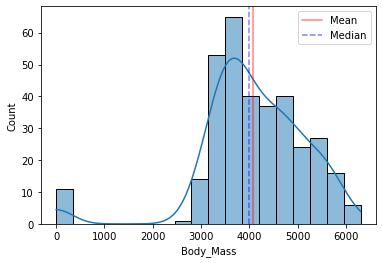

In [ ]:
sns.histplot(data = penguin['Body_Mass'], kde = True)
plt.axvline(x=penguin.Body_Mass.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=penguin.Body_Mass.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()

- Histogram suggests there are many values entered as 0 for BMI. It seems missing values may be entered as 0. Hence, these values should be replaced as NaN. 

In [ ]:
penguin.Body_Mass[penguin.Body_Mass == 0]

8      0.0
13     0.0
36     0.0
37     0.0
70     0.0
71     0.0
90     0.0
125    0.0
154    0.0
192    0.0
236    0.0
Name: Body_Mass, dtype: float64

In [ ]:
penguin.Body_Mass[penguin.Body_Mass == 0] = np.nan
penguin.Body_Mass[np.isnan(penguin.Body_Mass)]

C:\Users\sandy\AppData\Local\Temp/ipykernel_20256/1950505643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguin.Body_Mass[penguin.Body_Mass == 0] = np.nan


3     NaN
8     NaN
13    NaN
26    NaN
36    NaN
37    NaN
53    NaN
70    NaN
71    NaN
83    NaN
90    NaN
98    NaN
125   NaN
128   NaN
154   NaN
171   NaN
192   NaN
236   NaN
288   NaN
339   NaN
342   NaN
Name: Body_Mass, dtype: float64

## Analyzing the amount of missing data


In [ ]:
penguin_missing = penguin.isnull()
penguin_missing

,Species,Island,Clutch_Completion,Culmen_Length,Culmen_Depth,Flipper_Length,Body_Mass,Sex
0,False,False,False,True,True,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
339,False,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False,False
342,False,False,False,False,False,False,True,False


In [ ]:
# Total missing values
penguin_missing.sum()

Species                0
Island                 0
Clutch_Completion      0
Culmen_Length         56
Culmen_Depth         109
Flipper_Length         7
Body_Mass             21
Sex                   11
dtype: int64

In [ ]:
# Percentage of missing values
penguin_missing.mean() * 100

Species               0.000000
Island                0.000000
Clutch_Completion     0.000000
Culmen_Length        16.279070
Culmen_Depth         31.686047
Flipper_Length        2.034884
Body_Mass             6.104651
Sex                   3.197674
dtype: float64

In [ ]:
import missingno as msno # library to examine missing values

<AxesSubplot:>

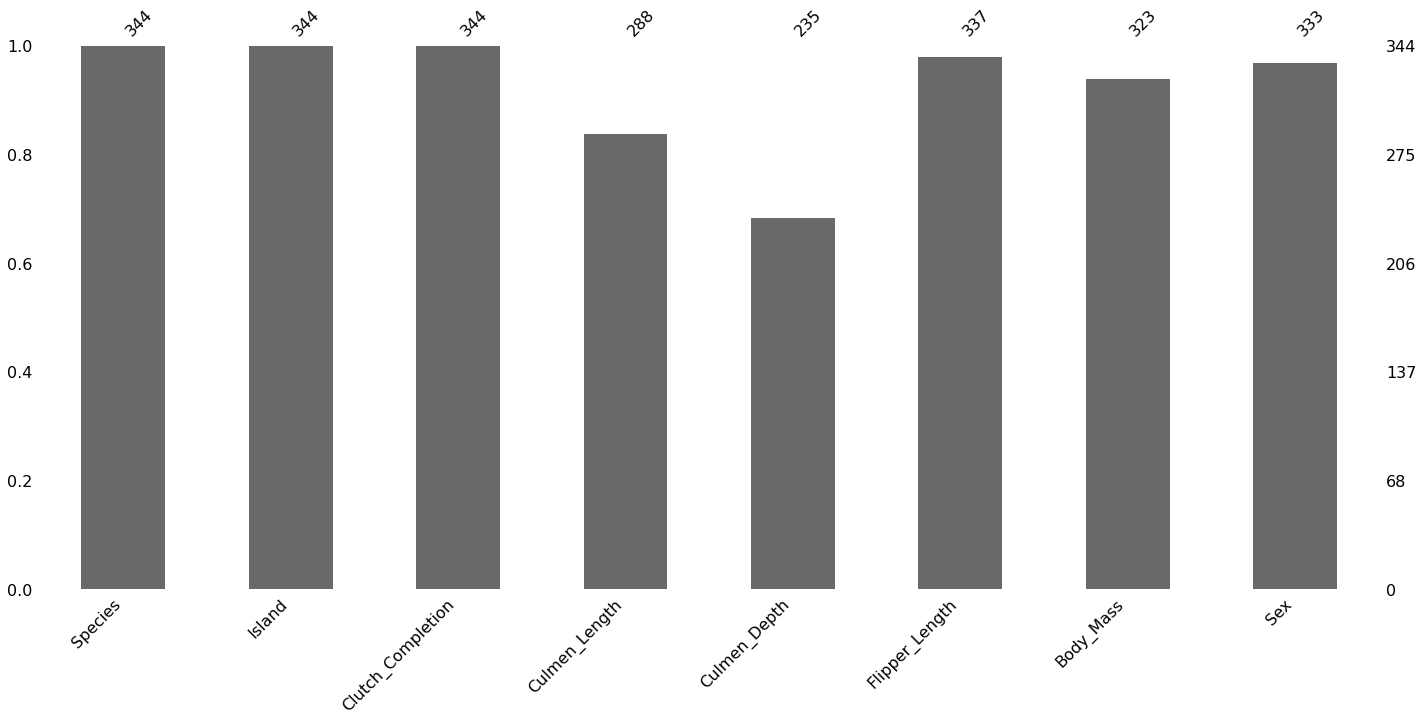

In [ ]:
# creating bar plot to see the missing values
msno.bar(penguin)

<AxesSubplot:>

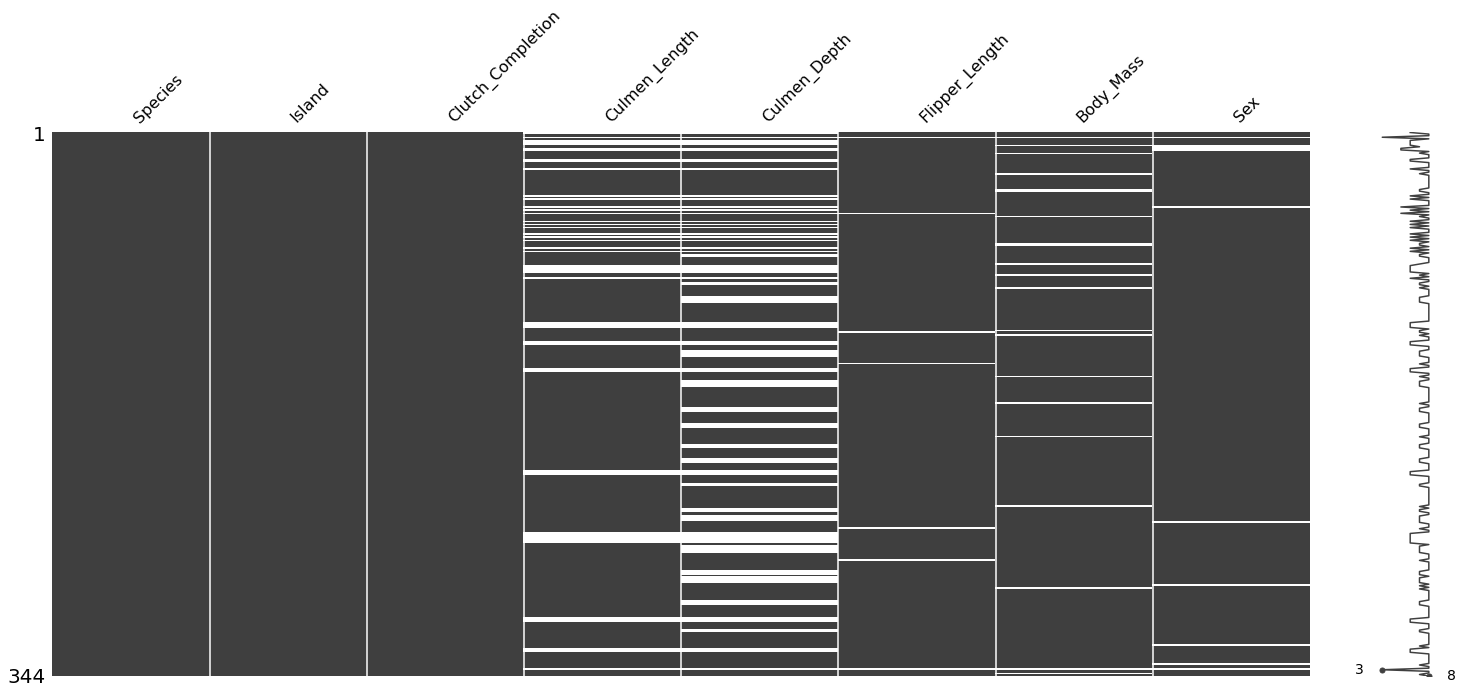

In [ ]:
# creating matrix plot to see the pattern in missing values 
msno.matrix(penguin)

**Missing values will be blank**

**Spark line on the right summarizes the general shape of data of completeness and points out the row the minimal number of null values and total count of the columns at the bottom.**

**This plot is extremely useful for time series dataset where you can easily explore pattern in the dataset.**

### Is there any pattern in missing data?
**Manipulated penguin dataset**
- Missing values can be of multiple types


**1- Missing completely at random (MCAR)**: "Missingness has no relationship between any values, observed or missing."

**2- Missing at Ranodm (MAR)**: "There is a systematic relationship between missingness and other observed data, but not
the missing data".

**3- Missing not at Random (MNAR)**: "There is a relationship between missingness and its values, missing or non-missing."

<AxesSubplot:>

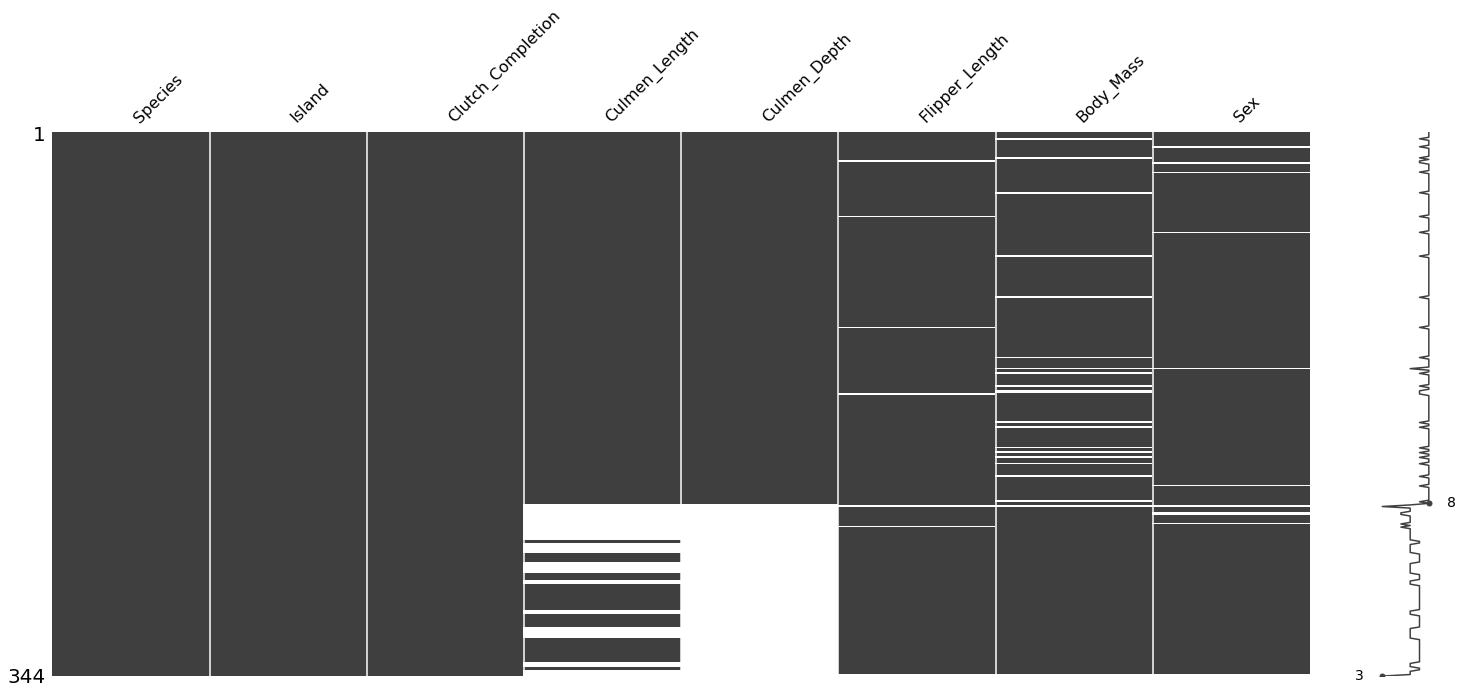

In [ ]:
sorted = penguin.sort_values('Culmen_Depth')
msno.matrix(sorted)

- It seems there is a clear relationship between culmen length and culmen depth.

## Finding correlation between missing values

<AxesSubplot:>

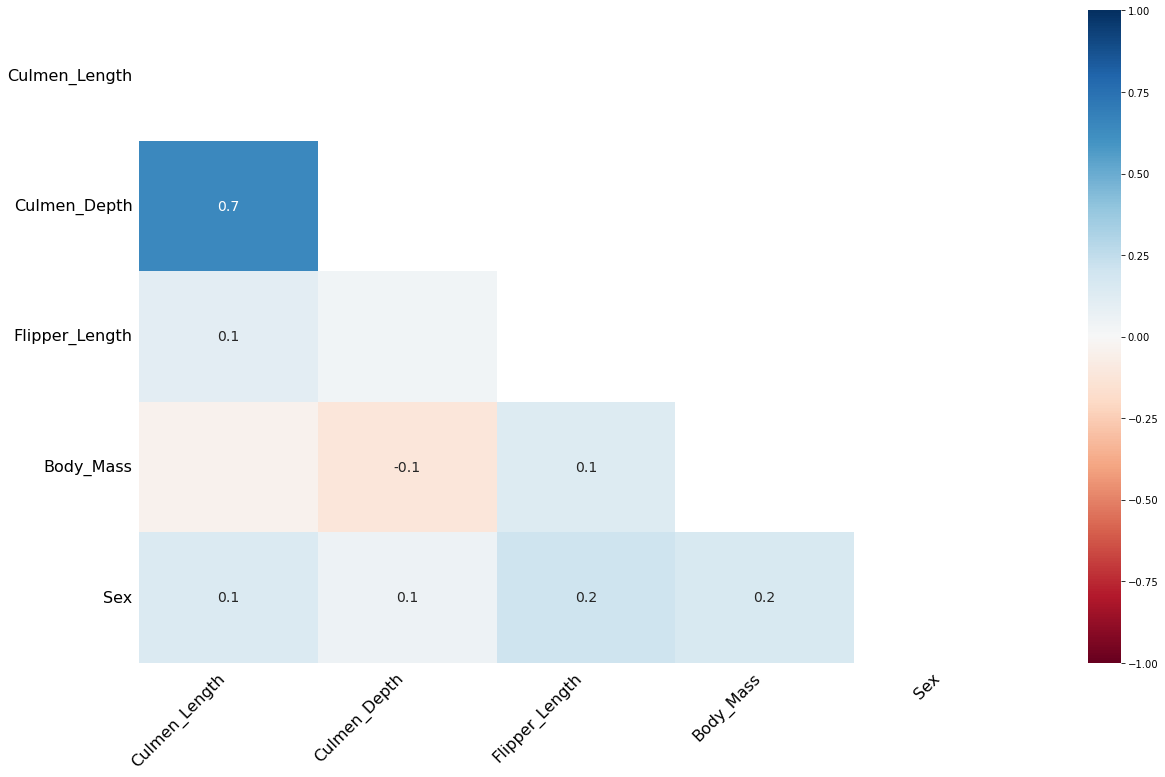

In [ ]:
msno.heatmap(penguin)

### Types of deletion when to delete and when not to delete

**1- Pairwise deletion**: we only skip the missing values (summing a column or calculating mean)

**2- Listwise deletion**: we delete the complete row

Only for MCAR

Use when number of missing values are extremely small, again domain specific.

### Creating dummy variables

- Remember NaN are float in python

In [ ]:
## Converting males to 0 and females to 1
penguin['Sex'] = penguin.Sex.map({'MALE': 0, 'FEMALE':1})

## Converting clutch completion no = 0  and yes = 1
penguin['Clutch_Completion'] = penguin.Clutch_Completion.map({'No': 0, 'Yes':1})

## Converting species Adelie = 0 chinstrap = 1, and Gentoo = 2
penguin['Species'] = penguin.Species.map({'Adelie Penguin (Pygoscelis adeliae)': 0, 'Chinstrap penguin (Pygoscelis antarctica)':1,
                                                   'Gentoo penguin (Pygoscelis papua)':2})

## Converting Island Biscoe = 0 Dream = 1, and Torgersen = 2
penguin['Island'] = penguin.Island.map({'Biscoe': 0, 'Dream':1,
                                                   'Torgersen':2})

In [ ]:
penguin.head()

,Species,Island,Clutch_Completion,Culmen_Length,Culmen_Depth,Flipper_Length,Body_Mass,Sex
0,0,2,1,NaN,NaN,181.0,3750.0,0.0
1,0,2,1,39.5,17.4,186.0,3800.0,1.0
2,0,2,1,40.3,18.0,195.0,3250.0,1.0
3,0,2,1,NaN,NaN,NaN,NaN,NaN
4,0,2,1,36.7,19.3,193.0,3450.0,1.0


### Basic imputation techniques

#### Mean imputation

In [ ]:
from sklearn.impute import SimpleImputer
penguin_mean = penguin.copy(deep=True) # creating a copy for further evaluation
mean_imputer = SimpleImputer(strategy='mean')
penguin_mean.iloc[:, :] = mean_imputer.fit_transform(penguin_mean)

#### Median imputation

In [ ]:
penguin_median = penguin.copy(deep=True) # creating a copy for further evaluation
median_imputer = SimpleImputer(strategy='median')
penguin_median.iloc[:, :] = median_imputer.fit_transform(penguin_median)

#### Mode imputation

In [ ]:
penguin_mode = penguin.copy(deep=True) # creating a copy for further evaluation
mode_imputer = SimpleImputer(strategy='most_frequent')
penguin_mode.iloc[:, :] = mode_imputer.fit_transform(penguin_mode)

#### Constant imputation

In [ ]:
penguin_constant = penguin.copy(deep=True) # creating a copy for further evaluation
constant_imputer = SimpleImputer(strategy='constant', fill_value = 0)
penguin_constant.iloc[:, :] = constant_imputer.fit_transform(penguin_constant)

### Advance Imputation techniques

In [ ]:
from fancyimpute import KNN
knn_imputer = KNN()
penguin_knn = penguin.copy(deep=True)
penguin_knn.iloc[:, :] = knn_imputer.fit_transform(penguin_knn)

Imputing row 1/344 with 2 missing, elapsed time: 0.062
Imputing row 101/344 with 0 missing, elapsed time: 0.062
Imputing row 201/344 with 0 missing, elapsed time: 0.062
Imputing row 301/344 with 0 missing, elapsed time: 0.062


In [ ]:
penguin_knn.head()

,Species,Island,Clutch_Completion,Culmen_Length,Culmen_Depth,Flipper_Length,Body_Mass,Sex
0,0.0,2.0,1.0,40.170951,18.150009,181.0,3750.0,0.0
1,0.0,2.0,1.0,39.500000,17.400000,186.0,3800.0,1.0
2,0.0,2.0,1.0,40.300000,18.000000,195.0,3250.0,1.0
3,0.0,2.0,1.0,38.860000,17.560000,191.8,3880.0,0.4
4,0.0,2.0,1.0,36.700000,19.300000,193.0,3450.0,1.0


- Provides numerical values, even for categorical data.
- For binary variable, we can treat anything < 0.5 as 0 and 0.5 >= as 1.

**2- Multiple Imputation by chained equation**

- Perform multiple regressions over random sample of the data

- Take average of the multiple regression values

- Impute the missing feature value for the data point

In [ ]:
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
penguin_MICE = penguin.copy(deep=True)
penguin_MICE.iloc[:, :] = MICE_imputer.fit_transform(penguin_MICE)

In [ ]:
penguin_MICE.head()

,Species,Island,Clutch_Completion,Culmen_Length,Culmen_Depth,Flipper_Length,Body_Mass,Sex
0,0.0,2.0,1.0,43.379128,19.941864,181.000000,3750.000000,0.000000
1,0.0,2.0,1.0,39.500000,17.400000,186.000000,3800.000000,1.000000
2,0.0,2.0,1.0,40.300000,18.000000,195.000000,3250.000000,1.000000
3,0.0,2.0,1.0,41.404045,19.158050,188.485662,3507.267984,0.474302
4,0.0,2.0,1.0,36.700000,19.300000,193.000000,3450.000000,1.000000


- Provides numerical values, even for categorical data.
- For binary variable, we can treat anything < 0.5 as 0 and 0.5 >= as 1.

### Visualzing Imputation 

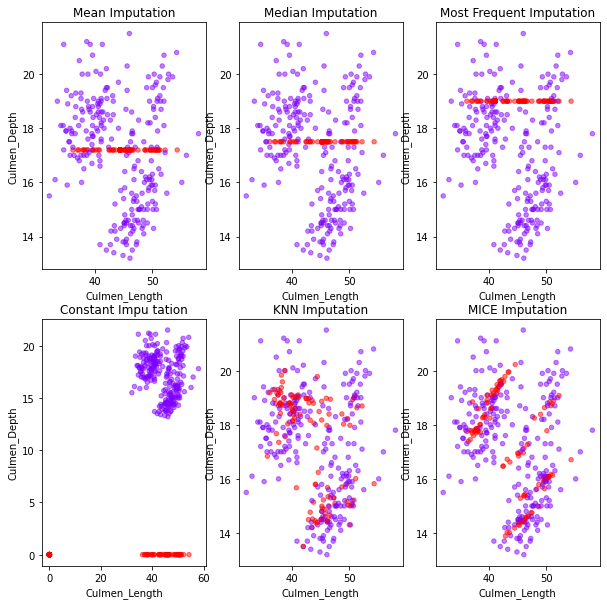

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))
nullity = penguin['Culmen_Length'].isnull() + penguin['Culmen_Depth'].isnull()
imputations = {'Mean Imputation': penguin_mean,
               'Median Imputation': penguin_median,
               'Most Frequent Imputation': penguin_mode,
               'Constant Impu tation': penguin_constant,
               'KNN Imputation': penguin_knn,
              'MICE Imputation': penguin_MICE}

for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(x='Culmen_Length', y='Culmen_Depth', kind='scatter',
                             alpha=0.5, c=nullity, cmap='rainbow', ax=ax,
                             colorbar=False, title=df_key)

- Visualization clearly suggest KNN imputation as a better approach to deal with missing values. However, this example is only applicable here as there is clearly a relationship in missingness between culmen length and culmen depth.

- For different variables a different approach may be better for missing value.
- For example, we can create box plot between missing value vs non missing values for numerical variable
- Bar plot for categorical variable.

- Overall justification is must when we are doing anything.